In [10]:
import torch
import seaborn as sb
import numpy as np
import pandas as pd

### Data Preparation and Loading

Machine learning is broadly done in two steps:
1. Get data (in the form of text,image,excel sheets,video,audio,etc) and convert it into numerical encodings (into tensors).
2. Build/Select a neural network to learn patterns in the numerical encoding

> NOTE: anything in the universe that can be represented by numbers, can be fed into a machine learning model!

We'll start with the first step.

We'll create some data using the linear regression formula, then we'll use a model to fit to the data and predict the known weight and bias

#### 1. Creating our Data

In [7]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) 
# we added an extra dimension of size 1 the purpose of which will be cleared later.

y = weight*X + bias 

<Axes: xlabel='X', ylabel='y'>

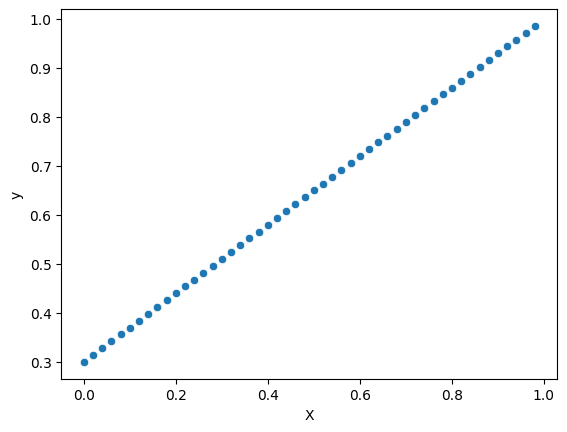

In [ ]:
# visualizing the created data 

# Convert tensors to numpy arrays and flatten (convert from multidimensional to 1D array)
X_np = X.numpy().flatten()
y_np = y.numpy().flatten()

# Create a DataFrame for easier plotting
# we pass a dictionary to Dataframe constructor where Keys X,y are cols and X_np,y_np are data in the cols
df = pd.DataFrame({'X': X_np, 'y': y_np})

# Plot using seaborn
sb.scatterplot(data=df, x='X', y='y')

#### 2. Splitting Data into Three Sets

Before directly feeding all our data to the machine learning model, we split our data into three very important sets:

1. **Training Set** - (say 70% of the data) This is the data our model uses to learn patterns in the numerical  representation of our data. It is like the course material you use to learn in your university.
2. **Validation Set** - (15% of the data) This part of the data is used to tune the model. This is where we run some optimization algorithm to learn the weights and biases in your model. This is like a practice exam you take to identify any gaps in your knowledge so that you can improve and properly learn the concepts.
3. **Test Set** - (15% of the data) This is used as a final test of our model, to see if it is ready for real world unseen data. It is like the final exam where you're tested whether you've gained anything out of the course or not. This is done to check if your model is able to *Generalize* (perform well on data it hasn't seen before).

> NOTE: validation set is not always made. It depends on how much data you have. If you have scarcity of data, we just use the training and the test set

In [8]:
# let's take 80% of the data as train data and 20% as test data

train_split = int(0.80*len(X)) # 0.80 (a float) multiplied to len(X) (int) gives float, but indices shd be int
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)